Перші рядки таблиці:
                                                   N  \
0  1,Junior QA engineer,,Manual QA,0.5,0.5,400,0,...   
1  2,Junior QA engineer,,Manual QA,менше 3 місяці...   
2  3,Software Engineer,C#/.NET,,4,1,2500,800,Київ...   
3  4,Software Engineer,JavaScript,,5,4,2000,400,О...   
4  5,Senior Software Engineer,JavaScript,,10 і бі...   

                                              Посада Мова програмування  \
0   like Gecko) Chrome/58.0.3029.110 Safari/537.36""                0.5   
1   like Gecko) Version/10.0 Mobile/14D27 Safari/...                  0   
2   like Gecko) Chrome/58.0.3029.110 Safari/537.36""                  4   
3   like Gecko) Chrome/58.0.3029.110 Safari/537.36""                  5   
4   like Gecko) Version/10.0 Mobile/14F89 Safari/...                 10   

  Спеціалізація Загальний досвід роботи Досвід роботи на поточному місці  \
0           0.5                     400                              NaN   
1             0                     430

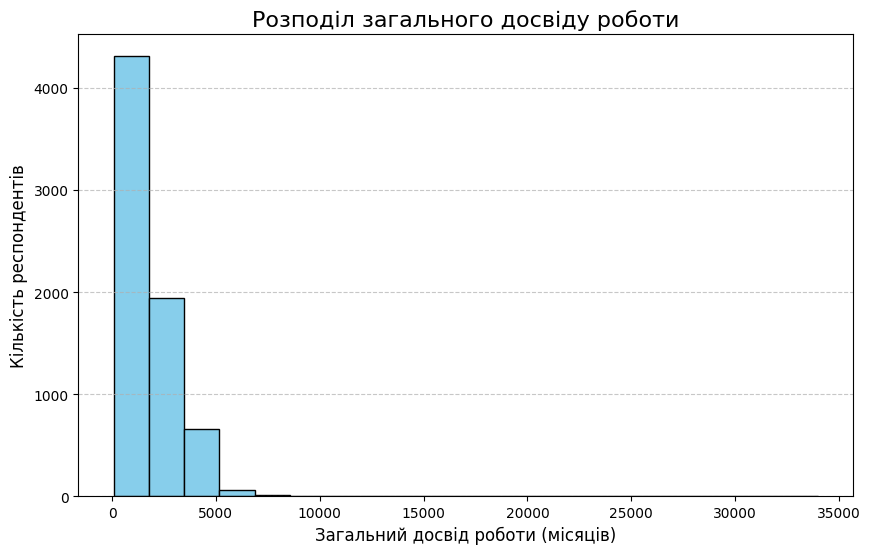

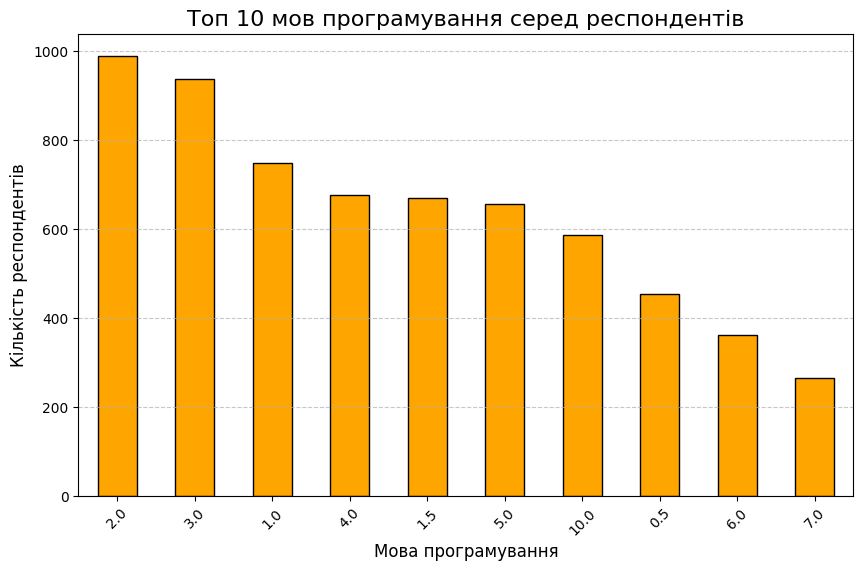

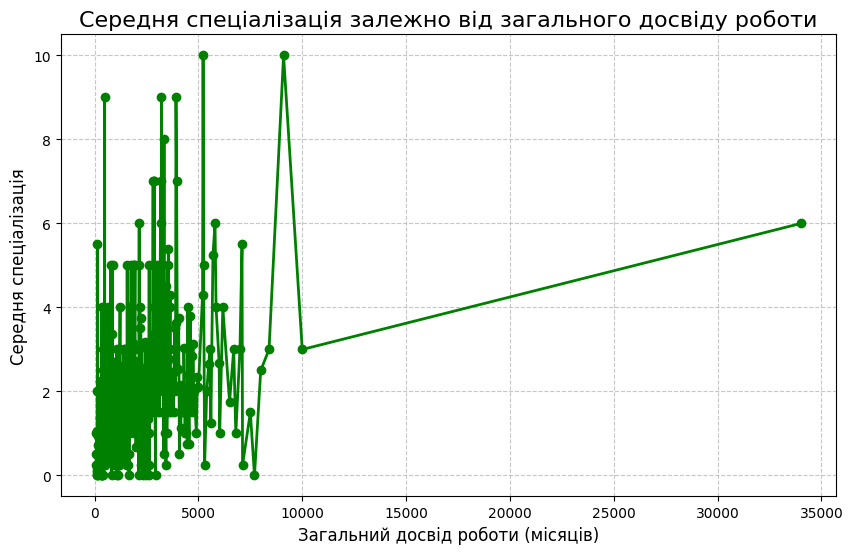

In [15]:
# Імпортуємо необхідні бібліотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Директива для відображення графіків у Jupyter Notebook
%matplotlib inline

# Шлях до оригінального файлу
file_path = "2017_jun_final.csv"

# Попереднє очищення файлу
with open(file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

# Очищення зайвих символів
cleaned_lines = [line.replace('";', '').replace('";;;;;;;', '') for line in lines]

# Збереження очищеного файлу
cleaned_file_path = "cleaned_2017_jun_final.csv"
with open(cleaned_file_path, "w", encoding="utf-8") as cleaned_file:
    cleaned_file.writelines(cleaned_lines)

# Читання очищеного файлу
df = pd.read_csv(cleaned_file_path, delimiter=",", encoding="utf-8", on_bad_lines="skip")

# Видалення колонок з назвою "Unnamed"
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# Перевірка перших рядків
print("Перші рядки таблиці:")
print(df.head())

# Виведення розміру таблиці
print("\nРозмір таблиці (рядки, стовпці):")
print(df.shape)

# Типи стовпців
print("\nТипи стовпців:")
print(df.dtypes)

# Частка пропусків
print("\nЧастка пропусків у кожному стовпці:")
print(df.isnull().sum() / len(df))

# Видалення колонок із високим рівнем пропусків (> 50%)
threshold = 0.5
cols_to_drop = df.columns[df.isnull().mean() > threshold]
df.drop(columns=cols_to_drop, inplace=True)

print("\nКолонки після видалення з високим рівнем пропусків:")
print(df.columns)

# Видалення рядків із пропусками
df.dropna(inplace=True)

# Новий розмір таблиці
print("\nНовий розмір таблиці після очищення:")
print(df.shape)

# Збереження очищених даних
processed_file_path = "processed_data.csv"
df.to_csv(processed_file_path, index=False)
print(f"\nОчищені дані збережено у файл: {processed_file_path}")

# Завантаження очищених даних з файлу
cleaned_data = pd.read_csv("processed_data.csv")

# Перевірка перших рядків
print("\nПерші рядки очищених даних:")
print(cleaned_data.head())

# Розмір очищених даних
print("\nРозмір очищених даних (рядки, стовпці):")
print(cleaned_data.shape)

# Типи даних очищеного файлу
print("\nТипи даних очищеного файлу:")
print(cleaned_data.dtypes)

# Описова статистика очищених даних
print("\nОписова статистика очищених даних:")
print(cleaned_data.describe(include='all'))

# Будуємо графіки на основі очищених даних:

## Графік 1: Розподіл загального досвіду роботи
plt.figure(figsize=(10, 6))
plt.hist(cleaned_data["Загальний досвід роботи"], bins=20, edgecolor="k", color="skyblue")
plt.title("Розподіл загального досвіду роботи", fontsize=16)
plt.xlabel("Загальний досвід роботи (місяців)", fontsize=12)
plt.ylabel("Кількість респондентів", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Графік 2: Розподіл мов програмування
popular_langs = cleaned_data["Мова програмування"].value_counts().head(10)
plt.figure(figsize=(10, 6))
popular_langs.plot(kind="bar", color="orange", edgecolor="k")
plt.title("Топ 10 мов програмування серед респондентів", fontsize=16)
plt.xlabel("Мова програмування", fontsize=12)
plt.ylabel("Кількість респондентів", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.show()

## Графік 3: Середня спеціалізація за досвідом роботи
avg_specialization_by_exp = cleaned_data.groupby("Загальний досвід роботи")["Спеціалізація"].mean()
plt.figure(figsize=(10, 6))
avg_specialization_by_exp.plot(kind="line", marker="o", color="green", linewidth=2)
plt.title("Середня спеціалізація залежно від загального досвіду роботи", fontsize=16)
plt.xlabel("Загальний досвід роботи (місяців)", fontsize=12)
plt.ylabel("Середня спеціалізація", fontsize=12)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()













    
    
 
   


   

  